# Решение кейса для продуктовых аналитиков (лето 2025)

In [2]:
import pandas as pd # Pandas = таблицы и данные
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # исключительно для визуализации графиков
import warnings

# Отключение варнингов - лишние предупреждения
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("kicksharing.csv")

In [4]:
display(df.sample(10)) # показываем первые 6 строк

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
379331,274964271,133701713,M,25,GRD,MAR,Г МОСКВА,7.49,50.0,300.0,SL,1.608382,2024-09-08 16:22:04.000000,2024-09-08 16:22:06.794000,2024-09-08 16:27:37.185371,3,2024-09-08 16:22:06.794000,94.94,18.99,NaN
288465,255772036,1051471091,M,33,GRD,MAR,РЕСП ЛУГАНСКАЯ НАРОДНАЯ,4.99,35.0,300.0,Max,0.062006,2024-06-29 14:06:47.000000,2024-06-29 14:06:52.956838,2024-06-29 14:07:44.077697,3,2024-06-29 14:06:52.956838,0.00,NaN,NaN
197319,274150480,861472516,M,25,UGR,UNM,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,3.749993,2024-09-05 21:15:55.000000,2024-09-05 21:15:59.685000,2024-09-05 21:24:33.248101,3,2024-09-05 21:15:59.685000,117.41,17.61,NaN
313422,271245950,695687786,M,19,NaN,NaN,NaN,6.49,30.0,300.0,E,1.212448,2024-08-26 18:03:01.000000,2024-08-26 18:03:05.376239,2024-08-26 18:08:31.578707,5,2024-08-26 20:03:05.376239,68.94,6.89,NaN
165310,274149655,396349240,M,40,GRD,UNM,СВЕРДЛОВСКАЯ ОБЛ,6.52,50.0,300.0,SL,0.000000,2024-09-05 21:39:52.000000,2024-09-05 21:39:56.449000,2024-09-05 21:42:36.392252,3,2024-09-05 21:39:56.449000,69.56,17.00,NaN
240447,268818548,566231751,M,49,NaN,NaN,Г МОСКВА,7.99,50.0,300.0,SL,0.008078,2024-08-16 22:41:03.000000,2024-08-16 22:41:07.358572,2024-08-16 22:44:35.602105,3,2024-08-16 22:41:07.358572,81.96,81.96,NaN
308720,261319482,938167349,M,34,NaN,UNM,РЕСП УДМУРТСКАЯ,4.99,50.0,300.0,Max,1.474432,2024-07-20 10:39:28.000000,2024-07-20 10:39:31.538610,2024-07-20 10:50:27.045994,4,2024-07-20 11:39:31.538610,104.89,10.49,NaN
325069,258139030,369819736,M,23,GRD,UNM,СТАВРОПОЛЬСКИЙ КРАЙ,7.79,50.0,300.0,E,3.454031,2024-07-08 15:15:52.000000,2024-07-08 15:16:00.115126,2024-07-08 15:34:51.020427,3,2024-07-08 15:16:00.115126,198.01,29.70,NaN
338919,332646448,746345156,M,38,NaN,NaN,Г МОСКВА,7.99,50.0,300.0,SL,2.499758,2024-09-14 23:25:07.000000,2024-09-14 23:25:10.782000,2024-09-14 23:31:27.989471,3,2024-09-14 23:25:10.782000,105.93,10.59,NaN
312243,256812122,371642691,M,28,UGR,NaN,Г МОСКВА,8.99,50.0,300.0,SL,2.073137,2024-07-03 16:19:47.000000,2024-07-03 16:19:50.787832,2024-07-03 16:36:17.498747,3,2024-07-03 16:19:50.787832,202.83,20.28,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [6]:
df.isnull().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

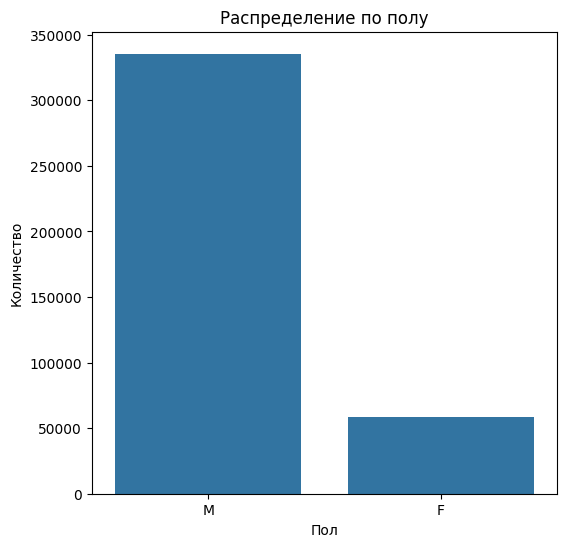

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df.gender_cd)


plt.title("Распределение по полу")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

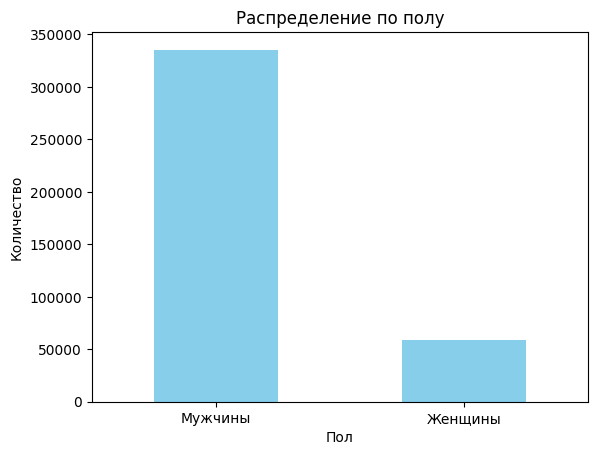

In [ ]:
df['gender_cd'].dropna().value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.title("Распределение по полу")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

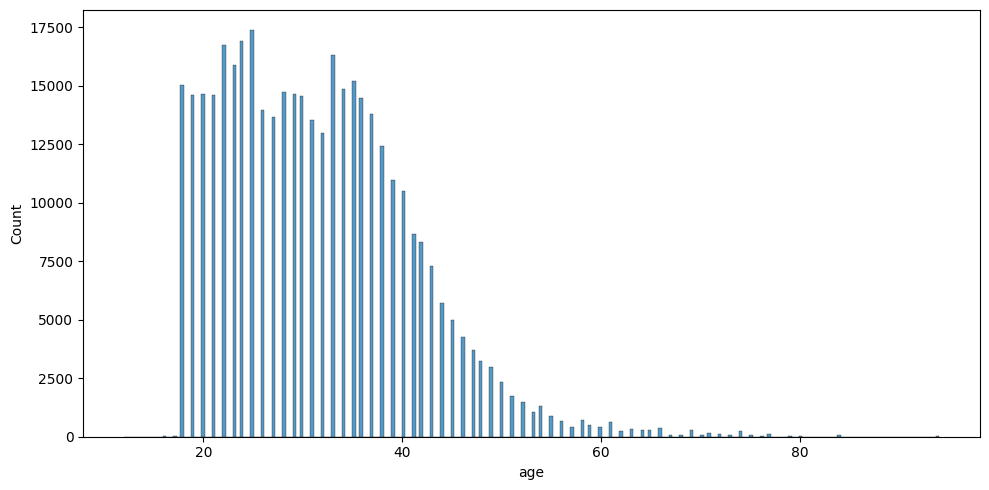

In [13]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='age')

plt.tight_layout()
plt.show()

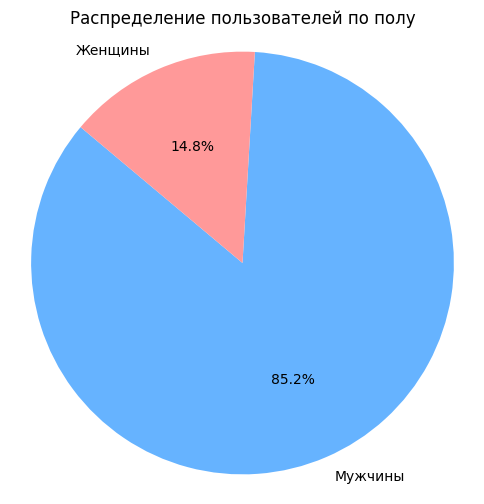

In [ ]:
# Убираем пропущенные значения
gender_counts = df['gender_cd'].dropna().value_counts()
df['gender_cd'] = df['gender_cd'].replace({'M': 'Мужчины', 'F': 'Женщины'})

# Подписи и цвета (по желанию)
labels = gender_counts.index
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Можно адаптировать под твои категории

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Распределение пользователей по полу')
plt.axis('equal')  # Чтобы круг был ровным
plt.show()

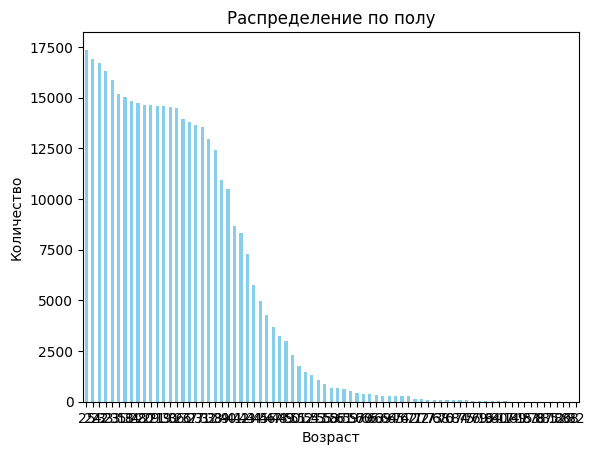

In [ ]:
df['age'].value_counts(dropna=False).plot(kind='bar', color='skyblue')

plt.title("Распределение по полу")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()